Notebook Link to Repository: <a href="https://github.com/uic-cs418/group-project-data-miners/blob/main/progress_report.ipynb">https://github.com/uic-cs418/group-project-data-miners/blob/main/progress_report.ipynb</a></p>

<h3>Project Introduction</h3>
<small>
  <p>
    Our project, <em>Washington State EV Adoption & Infrastructure</em>, explores why EV adoption varies across Washington State using three datasets:
  </p>
  <ul>
    <li>EV registration records, which provide detailed vehicle-level data including electric range, MSRP, model, and geographic location.</li>
    <li>Median income data by county, which reflects economic factors potentially influencing EV adoption.</li>
    <li>EV charging station data, detailing the number, type, and locations of charging infrastructure.</li>
  </ul>
  <p>
    <strong>Our key question:</strong> What factors contribute to higher rates of EV adoption in certain regions of Washington State?
  </p>
  <p>
    We hypothesize that counties with higher median incomes, more accessible charging infrastructure, and a greater presence of EVs with favorable attributes will have significantly higher adoption rates. The findings from this analysis can support better policy decisions, infrastructure investment, and environmental planning efforts aimed at expanding EV adoption equitably across the state.
  </p>
  <p>
    <strong>Any Changes:</strong><br>
    Yes, our project scope has changed significantly since the initial proposal. Initially, we aimed to analyze Steam gaming data, specifically exploring whether more gameplay hours led to higher in-game achievements. However, after analyzing the data further and seeing the available game options on Steam, we came to the conclusion that we wouldn’t have enough data to conduct a serious analysis. So we decided to shift our focus to electric vehicle adoption in Washington State, where we investigate why some regions adopt EVs more rapidly than others. This new direction allows us to work with publicly available datasets involving EV registrations, income levels, and charging infrastructure—enabling a deeper exploration using clustering, regression, and geospatial visualizations. This shift gave our project broader impact and more meaningful applications in sustainability and transportation policy.
  </p>
</small>

<h3>Data Cleaning</h3>
<small>
  Our cleaning process focused on three main datasets, and we show clearly how we cleaned our data:
</small>

<h4>EV Registration Data</h4>
<small>
  <ul style="margin-top:0;">
    <li><strong>Structure &amp; Granularity:</strong> Individual vehicle records (VIN, County, City, Model Year, Make, Model, Electric Range, Electric Vehicle Type).</li>
    <li><strong>Scope &amp; Temporality:</strong> Covers all EV registrations in Washington State from a specific snapshot date.</li>
    <li><strong>Faithfulness:</strong> Official records that may contain duplicates or missing values.</li>
    <li><strong>Transformations:</strong>
      <ul>
        <li>Removed duplicate records</li>
        <li>Trimmed whitespace in the "County" column</li>
        <li>Converted "Electric Range" to numeric (invalid values become NaN)</li>
      </ul>
    </li>
    <li><strong>Missing Values:</strong> Missing electric range values remain as NaN and are handled during aggregation (ignored in mean calculations).</li>
  </ul>
</small>

<h5>Steps for EV Data:</h5>
<small>
  Load CSV; remove duplicates; trim County whitespace; convert Electric Range to numeric (invalid &rarr; NaN); aggregate by county to compute
  <em>EV_Count</em>, <em>Avg_Electric_Range</em>, <em>Most_Common_Make</em>, and <em>Most_Common_Electric_Vehicle_Type</em>.
</small>

<h4>Median Income Data</h4>
<small>
  <ul style="margin-top:0;">
    <li><strong>Structure &amp; Granularity:</strong> County-level income estimates for 2020–2024.</li>
    <li><strong>Scope &amp; Temporality:</strong> Annual income data for each county.</li>
    <li><strong>Faithfulness:</strong> Sourced from official data; some missing entries may exist.</li>
    <li><strong>Transformations:</strong>
      <ul>
        <li>Trimmed county names</li>
        <li>Renamed income columns to a standard format (<code>Median_Income_2020</code> … <code>Median_Income_2024</code>)</li>
      </ul>
    </li>
    <li><strong>Missing Values:</strong> Retained as-is and merged without imputation.</li>
  </ul>
</small>

<h5>Steps for Income Data:</h5>
<small>
  Load CSV; trim County whitespace; rename columns for 2020–2024 to 
  <code>Median_Income_2020</code> – <code>Median_Income_2024</code>.
</small>

<h4>Charging Stations Data</h4>
<small>
  <ul style="margin-top:0;">
    <li><strong>Structure &amp; Granularity:</strong> Individual charging station records with location coordinates and county identifiers.</li>
    <li><strong>Scope &amp; Temporality:</strong> Represents all public EV charging stations in Washington State at data collection.</li>
    <li><strong>Faithfulness:</strong> Generally accurate, though some records lack coordinates.</li>
    <li><strong>Transformations:</strong>
      <ul>
        <li>Dropped rows missing Latitude/Longitude</li>
        <li>Trimmed and standardized the "county" field (removing trailing "County")</li>
        <li>Aggregated data to compute station counts</li>
      </ul>
    </li>
    <li><strong>Missing Values:</strong> Excluded records with missing coordinates to ensure reliable counts.</li>
  </ul>
</small>

<h5>Steps for Charging Stations Data:</h5>
<small>
  Load CSV; drop rows with missing Latitude/Longitude; trim County whitespace and remove trailing "County"; aggregate by county to compute <em>Station_Count</em>.
</small>

<h4>Merging</h4>
<small>
  Inner join EV data with Income data on County, then left join Charging Stations counts and fill missing values with zeros.<br>
  This yields a unified, county-level dataset with key EV metrics, standardized income estimates, and accurate charging station counts—ready for analysis.
</small>

In [22]:
from data_cleaning import (load_datasets, clean_ev_data, aggregate_ev_data, clean_income_data, get_station_counts, clean_stations_data, merge_data)

ev_path = "Electric_Vehicle_Population_Data_20250327.csv"
income_path = "Median Income.csv"
stations_path = "Public_EV_Charging_Stations_With_County.csv"

df_ev, df_income, df_stations = load_datasets(ev_path, income_path, stations_path)  # Load data
df_income = clean_income_data(df_income)  # Clean Income Data                                   
df_ev = clean_ev_data(df_ev) # Clean EV Data
ev_agg = aggregate_ev_data(df_ev)
df_stations = clean_stations_data(df_stations) # Clean Stations Data
stations_counts = get_station_counts(df_stations)
merged_df = merge_data(ev_agg, df_income, stations_counts) # Merge the cleaned and aggregated data on 'County'

display(merged_df.head())  # Display final merged DataFrame

County  EV_Count  Avg_Electric_Range Most_Common_Make  \
0    Adams        81           52.037037            TESLA   
1   Asotin        96           43.677083            TESLA   
2   Benton      3043           54.236842            TESLA   
3   Chelan      1433           54.680391            TESLA   
4  Clallam      1403           51.583036            TESLA   

  Most_Common_Electric_Vehicle_Type  Station_Count  2024_Median_Income  \
0    Battery Electric Vehicle (BEV)            3.0            72047.86   
1    Battery Electric Vehicle (BEV)            1.0            63963.65   
2    Battery Electric Vehicle (BEV)           20.0            80987.99   
3    Battery Electric Vehicle (BEV)           34.0            76794.05   
4    Battery Electric Vehicle (BEV)           29.0            67451.14   

   2023_Median_Income  2022_Median_Income  2021_Median_Income  \
0            67056.00             62410.0             57405.0   
1            67820.20             65625.0             56438.0   
2            87992.12             85144.0             77339.0   
3            84429.81             81697.0             64700.0   
4            68923.92             66693.0             62623.0   

   2020_Median_Income  
0             56421.0  
1             53377.0  
2             75882.0  
3             61546.0  
4             54712.0

<h3>Exploratory Data Analysis</h3>
<small>
  <p>
    We examined our county-level dataset to understand key variables and trends. Summary statistics reveal the following:
  </p>
  <ul>
    <li>
      <strong>EV Adoption:</strong> EV_Count varies significantly across counties, highlighting regional differences in EV registrations.
    </li>
    <li>
      <strong>Electric Range:</strong> Avg_Electric_Range provides insight into the typical performance of EVs registered in each county.
    </li>
    <li>
      <strong>Income:</strong> Standardized income estimates (Median_Income_2020–Median_Income_2024) show economic disparities that likely influence EV adoption.
    </li>
    <li>
      <strong>Charging Infrastructure:</strong> Station_Count indicates that charging availability varies widely, which may correlate with EV adoption levels.
    </li>
  </ul>
  <p>
    Overall, while higher-income counties tend to register more EVs and have better charging infrastructure, outliers suggest that additional factors may also be at play.
  </p>
</small>

In [ ]:
from eda import eda_summary, plot_ev_count, plot_station_counts_horizontal, plot_ev_vs_station

eda_summary(merged_df) # Display summary statistics and DataFrame info
plot_ev_count(merged_df) # Top 10 counties by EV registrations
plot_station_counts_horizontal(merged_df) # Top 10 counties by charging station count
plot_ev_vs_station(merged_df) # Scatter chart of EV Count vs. Charging Station Count

<h3>Visualization</h3>
<small>
  <p><strong>Hypothesis:</strong> Counties with higher median incomes and better charging infrastructure exhibit higher EV adoption.<strong> Explanation:</strong> Our visualization compares median income growth and EV adoption trends from 2020 to 2024 across the top 5 counties in Washington. We observe that counties with consistently higher or steadily increasing incomes also show rising EV adoption. This supports our hypothesis that economic capacity plays a key role in enabling EV adoption. The correlation between rising income and EV count growth suggests that targeted investments and incentives in lower-income regions could help accelerate statewide EV adoption.</p>
</small>

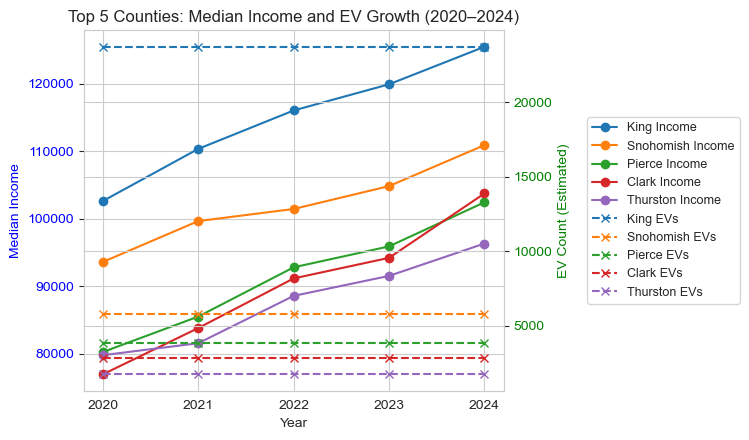

In [26]:
from viz import plot_top5_income_and_ev_growth
plot_top5_income_and_ev_growth(merged_df)

<h3>Machine Learning Analysis – Clustering with Baseline Comparison</h3>
<small>
  <p>
    <strong>Hypothesis:</strong> Counties can be segmented into distinct groups based on EV adoption, income, and charging station availability.
    <strong>Approach:</strong> We standardize the features (EV_Count, numeric Median_Income_2024, and Station_Count) and apply K-Means clustering. As a baseline, we considered a single cluster model (k=1) which groups all counties together, resulting in high within-cluster variance. The elbow method suggests an optimal k=3, indicating that dividing the data into three clusters significantly reduces variance and better captures differences among counties.
    <strong>Interpretation:</strong> The k=3 model reveals distinct clusters: high-income counties with high EV adoption and robust charging infrastructure versus lower-income counties with lower EV counts. Compared to the baseline, the three-cluster solution shows improved homogeneity within clusters, supporting our hypothesis that income and infrastructure drive EV adoption.
  </p>
</small>

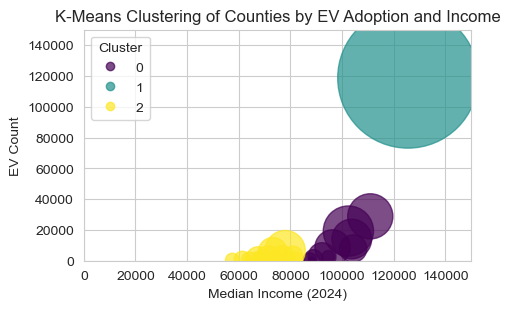

In [28]:
from ml_analysis import perform_clustering
clustered_df = perform_clustering(merged_df, n_clusters=3, plot_elbow=False)

<h3>Reflection</h3>
<small>
  <p><strong>Hardest Part:</strong> The toughest part so far was fixing and combining different datasets—making county names match and filling in missing info for EV records, income, and charging stations took tons of effort. It was like piecing together a puzzle with some bits lost, but we managed as a team. <strong>Initial Insights:</strong> We noticed richer counties like King have more EVs and charging spots, but some quiet areas shocked us with higher adoption, maybe because of deals or local habits. It’s got us thinking there’s more to it than just money, and we’re curious to dig deeper. <strong>Concrete Results:</strong> Our clustering shows solid links between money, charging stations, and EV use. Places with more cash and better setups have way more EVs. Seeing the patterns light up on our maps feels like proof we’re onto something real. <strong>Biggest Problems Going Forward:</strong> It’s hard to understand why some odd places don’t fit the trends and to pick the right details without overdoing it. We’re still arguing over what matters most, which makes things a bit slow and tricky. <strong>Project Status:</strong> We’re on track with results coming together nicely, and the team’s hard work is showing. We don’t need extra time yet; everything’s moving at a good pace, and we’re happy with the progress. <strong>Is It Worth Proceeding?</strong> Yes, it’s totally worth it—these findings could help make smarter EV rules and setups across the state. We think it’s valuable because it could push for greener choices, and we wouldn’t change it since the data’s already showing good stuff.</p>
</small>

<h3>Next Steps</h3>
<small>
  <ul style="margin: 0; padding-left: 20px;">
    <li><strong>Model Refinement:</strong> Further tune the parameters of our clustering model and validate them using techniques such as cross-validation.</li>
    <li><strong>Visualization Enhancement:</strong> Improve our visualizations for clarity and presentation, ensuring that they effectively communicate our findings.</li>
  </ul>
</small>